In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\netflix\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.shape

(8807, 12)

In [7]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df = df.dropna(axis=0, subset=['date_added'])
df = df.dropna(axis=0, subset=['rating'])
df = df.dropna(axis=0, subset=['duration'])

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
df.fillna({"country":"Unknown"},inplace=True)

In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [14]:
df.drop(columns=['show_id','director','cast', 'description'],inplace=True)
df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [15]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
df['rating'].replace(['TV-MA','R','NC-17'],'A',inplace = True)
df['rating'].replace(['TV-14'],'PG-13',inplace = True)
df['rating'].replace(['UR'],'NR',inplace = True)
df['rating'].replace(['TV-G', 'TV-Y','TV-Y7', 'TV-PG', 'G','TV-Y7-FV'],'PG',inplace = True)

In [17]:
df.rating.unique()

array(['PG-13', 'A', 'PG', 'NR'], dtype=object)

In [18]:
df

,type,title,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,A,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Unknown,"September 24, 2021",2021,A,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,"September 24, 2021",2021,A,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,"September 24, 2021",2021,A,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,"November 20, 2019",2007,A,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,Unknown,"July 1, 2019",2018,PG,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,United States,"November 1, 2019",2009,A,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


In [19]:
netflix_shows=df[df['type']=='TV Show']

In [20]:
netflix_movies=df[df['type']=='Movie']

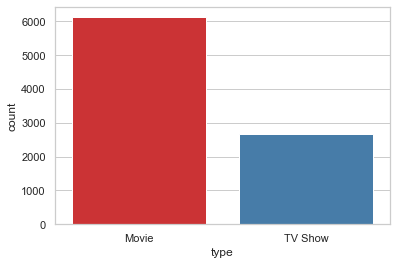

In [21]:
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=df, palette="Set1")

From the above bar graph it is seen that Netflix makes more movies than TV shows 

C:\Users\Hp\AppData\Local\Temp/ipykernel_3668/3736280367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
C:\Users\Hp\AppData\Local\Temp/ipykernel_3668/3736280367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])


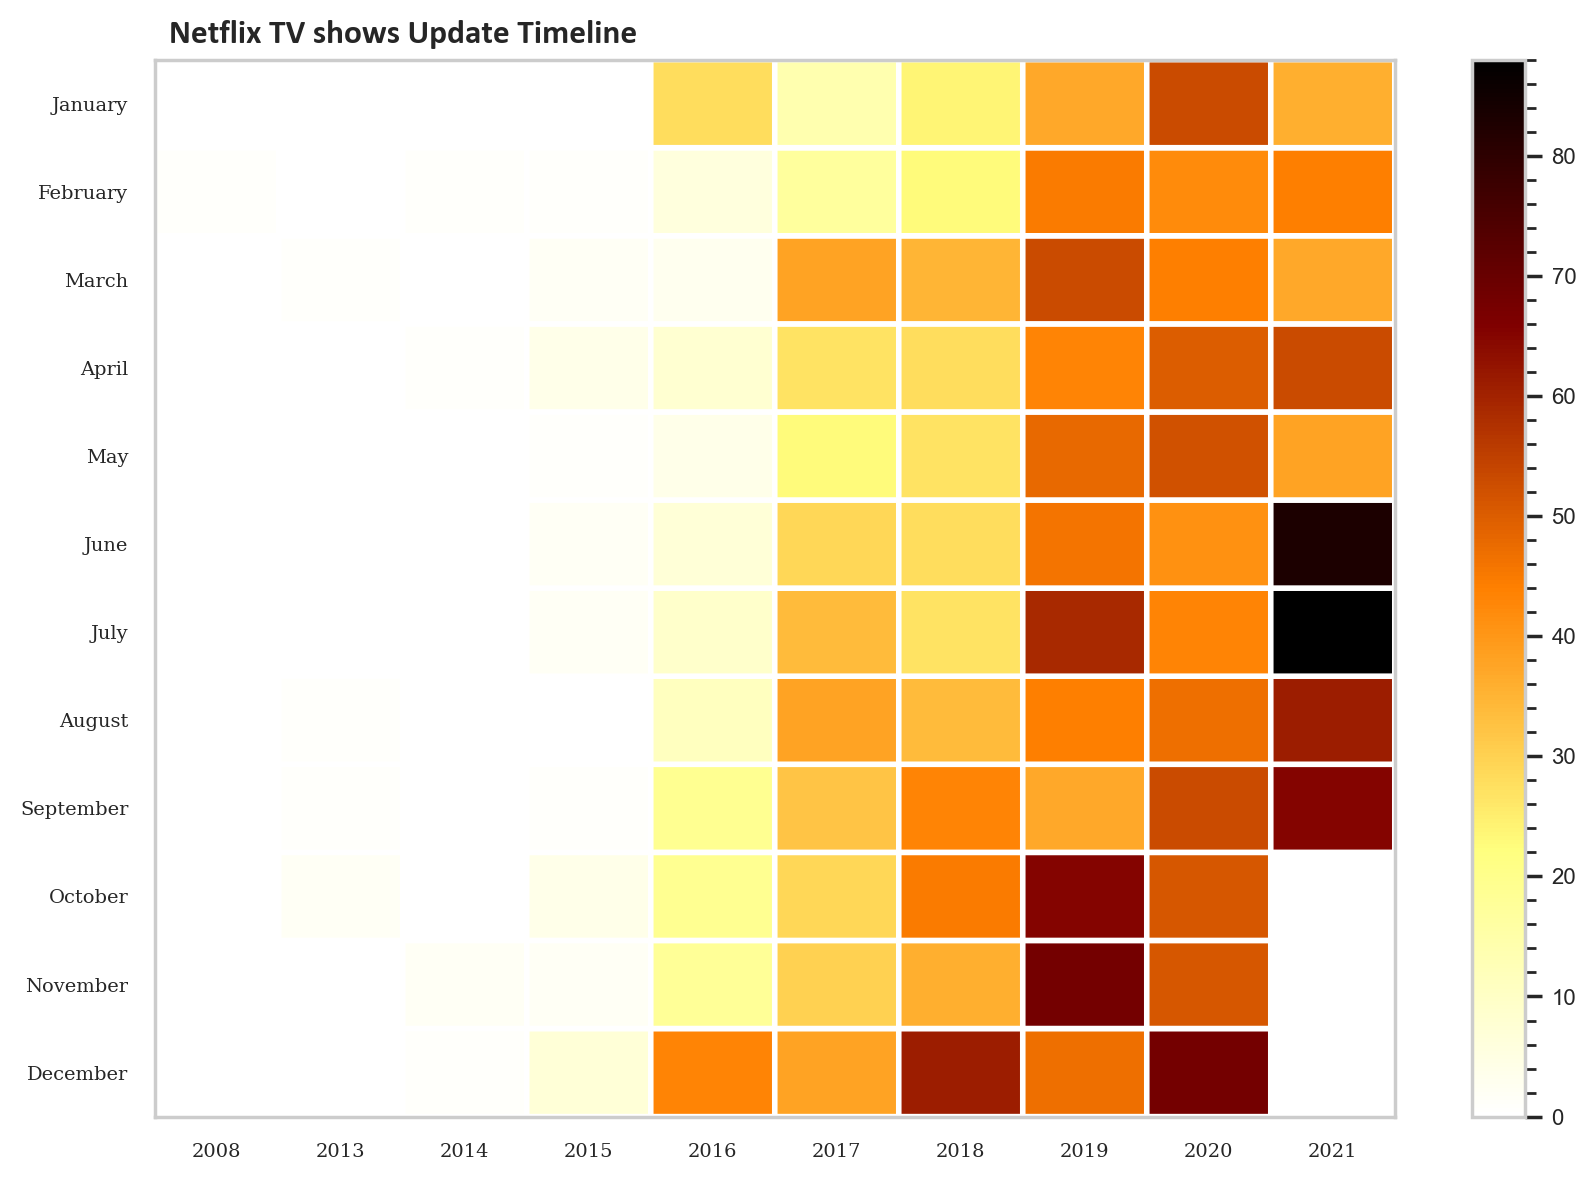

In [22]:
netflix_date = netflix_shows[['date_added']]
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df1 = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[months].T

plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df1, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index, fontsize=7, fontfamily='serif')

plt.title('Netflix TV shows Update Timeline', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

If the TV show release in recent years are considered, the end of the year accounts for highest number of releases. 

If a producer wants to release a show, he is suggested to plan his release towards the beginning of the year when there is comparitively less content

C:\Users\Hp\AppData\Local\Temp/ipykernel_3668/2335569946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
C:\Users\Hp\AppData\Local\Temp/ipykernel_3668/2335569946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])


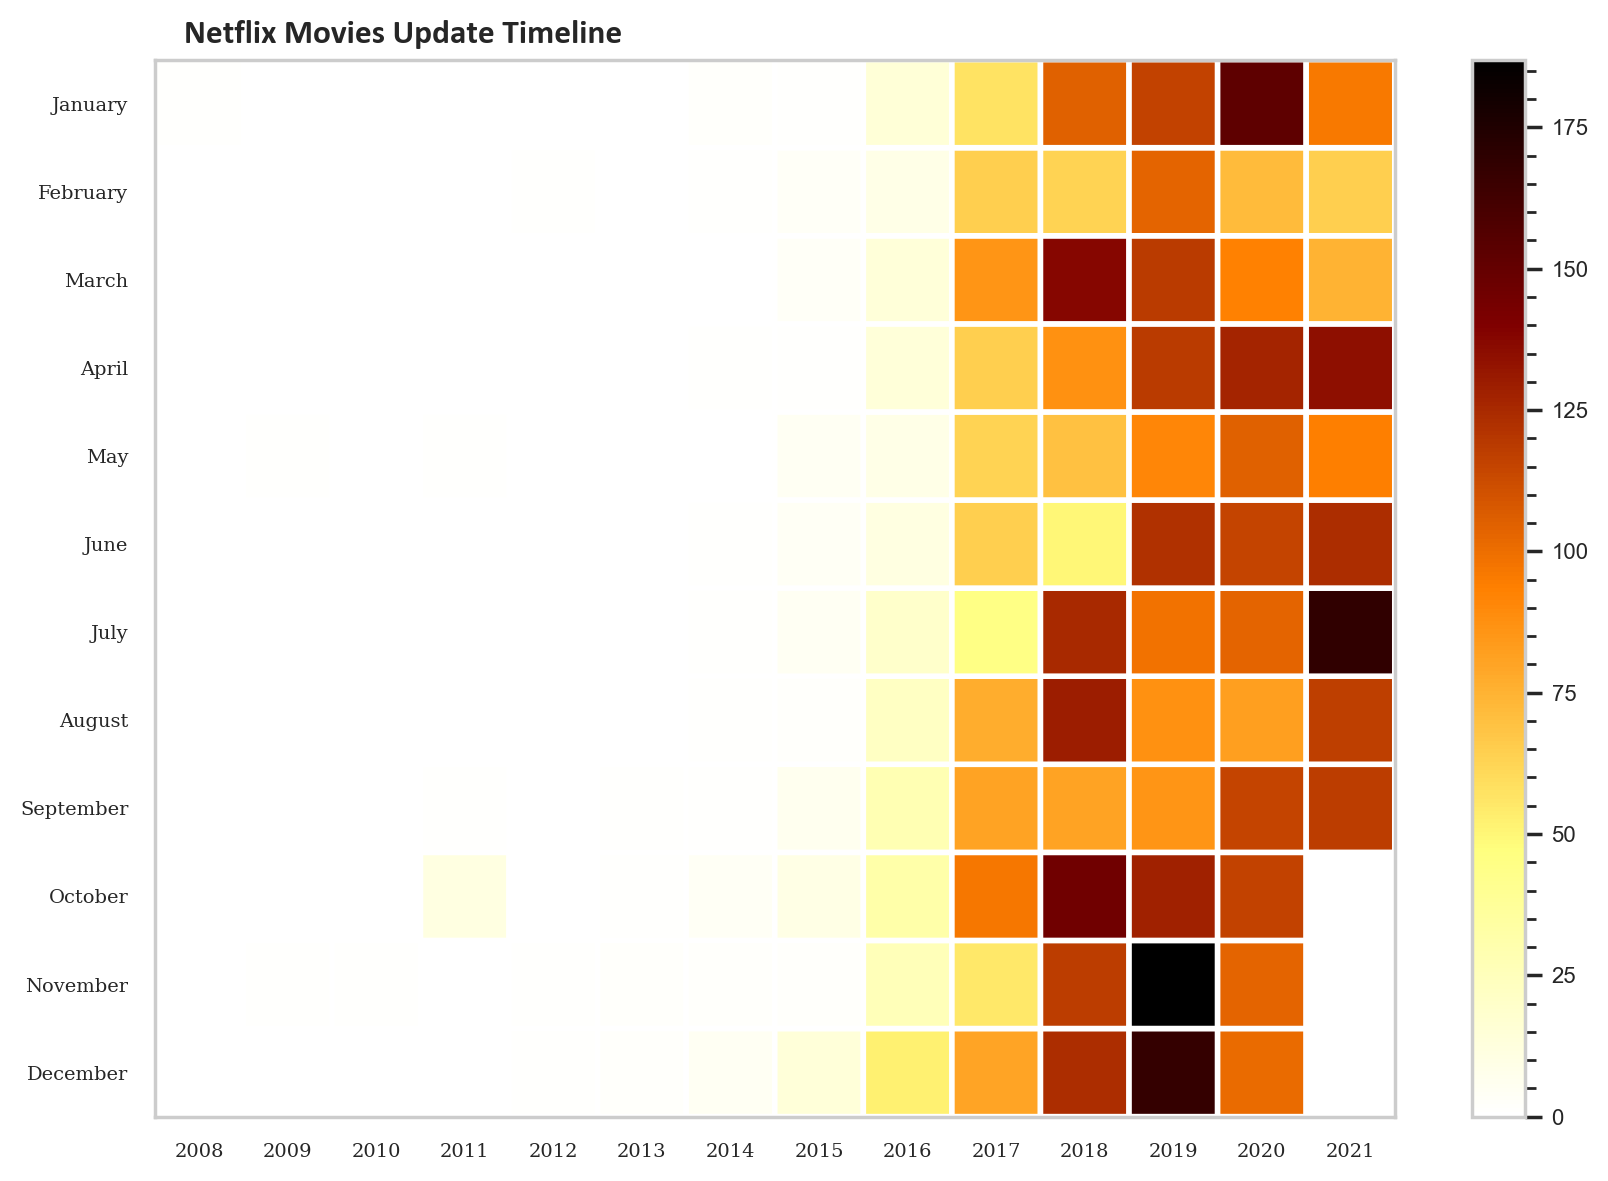

In [23]:
netflix_date = netflix_movies[['date_added']]
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df1 = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[months].T

plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df1, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Movies Update Timeline', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

If the movie release in recent years are considered, they are mostly spreadout all along the year.

If a producer wants to release a movie, he is suggested to plan his release in the month of February, May or September as there are less releases compared to other months

# Year wise analysis of Netflix content

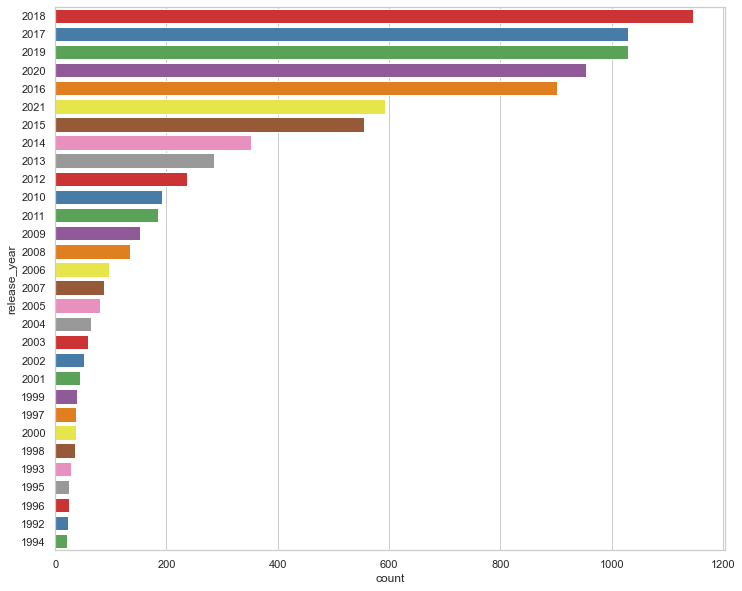

In [24]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df, palette="Set1", order=df['release_year'].value_counts().index[0:30])

Netflix released highest amount of content in the year 2018

# Movie rating analysis

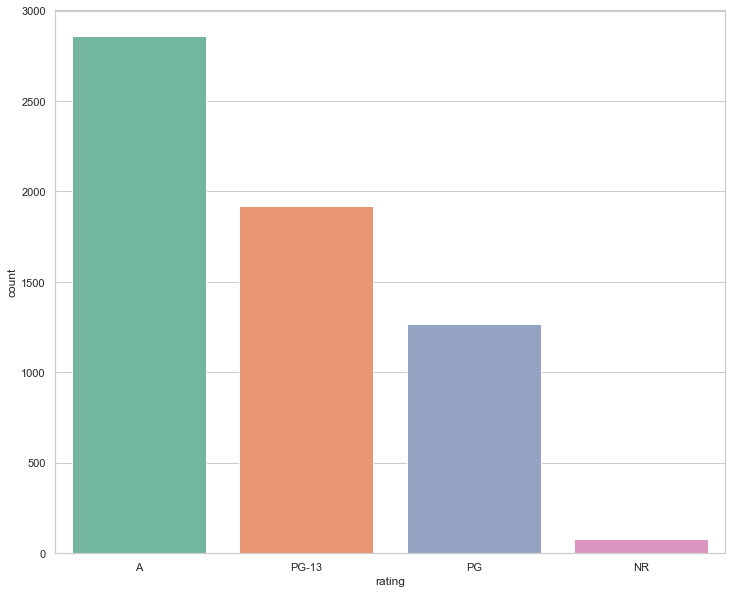

In [27]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'A' rating."A" is a rating assigned to a movie that was designed for mature audiences only.

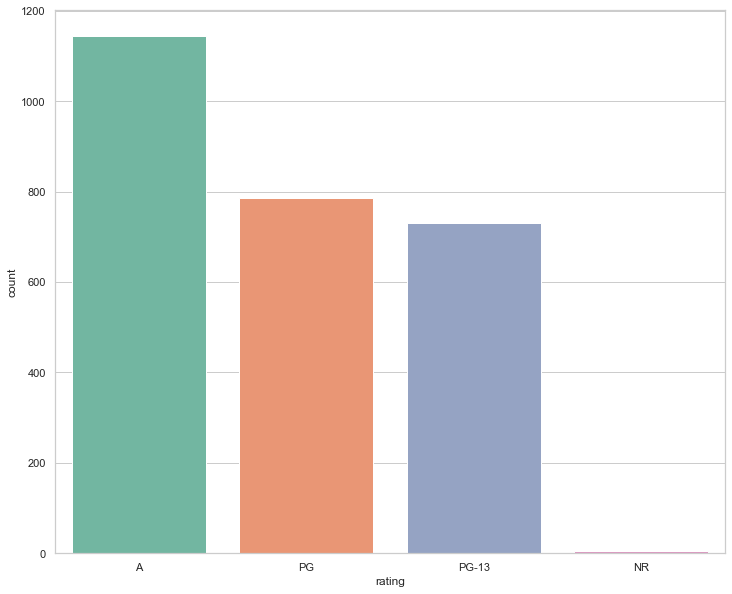

In [24]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(x="rating", data=netflix_shows, palette="Set2", order=netflix_shows['rating'].value_counts().index[0:15])

The largest count of TV shows are also made with the 'A' rating.

In [28]:
df["listed_in"] = df["listed_in"].str.split(",")
df

,type,title,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries]
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,A,2 Seasons,"[International TV Shows, TV Dramas, TV Myste..."
2,TV Show,Ganglands,Unknown,"September 24, 2021",2021,A,1 Season,"[Crime TV Shows, International TV Shows, TV ..."
3,TV Show,Jailbirds New Orleans,Unknown,"September 24, 2021",2021,A,1 Season,"[Docuseries, Reality TV]"
4,TV Show,Kota Factory,India,"September 24, 2021",2021,A,2 Seasons,"[International TV Shows, Romantic TV Shows, ..."
...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,"November 20, 2019",2007,A,158 min,"[Cult Movies, Dramas, Thrillers]"
8803,TV Show,Zombie Dumb,Unknown,"July 1, 2019",2018,PG,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,Movie,Zombieland,United States,"November 1, 2019",2009,A,88 min,"[Comedies, Horror Movies]"
8805,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]"


In [29]:
 df_explode = df.explode("listed_in")
df_explode.to_csv("df_explode.csv")

In [30]:
df_explode

,type,title,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,A,2 Seasons,International TV Shows
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,A,2 Seasons,TV Dramas
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,A,2 Seasons,TV Mysteries
2,TV Show,Ganglands,Unknown,"September 24, 2021",2021,A,1 Season,Crime TV Shows
...,...,...,...,...,...,...,...,...
8805,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies
8805,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,Comedies
8806,Movie,Zubaan,India,"March 2, 2019",2015,PG-13,111 min,Dramas
8806,Movie,Zubaan,India,"March 2, 2019",2015,PG-13,111 min,International Movies


In [29]:
df.loc[85]

type                                        TV Show
title           Pokémon Master Journeys: The Series
country                                     Unknown
date_added                       September 10, 2021
release_year                                   2021
rating                                           PG
duration                                   1 Season
listed_in                 [Anime Series,  Kids' TV]
Name: 85, dtype: object

In [30]:
print(len(df['listed_in'].explode().unique()))

73


In [34]:
df2 = df[['type','title','country','listed_in','release_year','duration']]
df2

,type,title,country,listed_in,release_year,duration
0,Movie,Dick Johnson Is Dead,United States,[Documentaries],2020,90 min
1,TV Show,Blood & Water,South Africa,"[International TV Shows, TV Dramas, TV Myste...",2021,2 Seasons
2,TV Show,Ganglands,Unknown,"[Crime TV Shows, International TV Shows, TV ...",2021,1 Season
3,TV Show,Jailbirds New Orleans,Unknown,"[Docuseries, Reality TV]",2021,1 Season
4,TV Show,Kota Factory,India,"[International TV Shows, Romantic TV Shows, ...",2021,2 Seasons
...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,"[Cult Movies, Dramas, Thrillers]",2007,158 min
8803,TV Show,Zombie Dumb,Unknown,"[Kids' TV, Korean TV Shows, TV Comedies]",2018,2 Seasons
8804,Movie,Zombieland,United States,"[Comedies, Horror Movies]",2009,88 min
8805,Movie,Zoom,United States,"[Children & Family Movies, Comedies]",2006,88 min


In [35]:
df2["country"] = df2["country"].str.split(",")
df2

C:\Users\Hp\AppData\Local\Temp/ipykernel_11708/1719026654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["country"] = df2["country"].str.split(",")


,type,title,country,listed_in,release_year,duration
0,Movie,Dick Johnson Is Dead,[United States],[Documentaries],2020,90 min
1,TV Show,Blood & Water,[South Africa],"[International TV Shows, TV Dramas, TV Myste...",2021,2 Seasons
2,TV Show,Ganglands,[Unknown],"[Crime TV Shows, International TV Shows, TV ...",2021,1 Season
3,TV Show,Jailbirds New Orleans,[Unknown],"[Docuseries, Reality TV]",2021,1 Season
4,TV Show,Kota Factory,[India],"[International TV Shows, Romantic TV Shows, ...",2021,2 Seasons
...,...,...,...,...,...,...
8802,Movie,Zodiac,[United States],"[Cult Movies, Dramas, Thrillers]",2007,158 min
8803,TV Show,Zombie Dumb,[Unknown],"[Kids' TV, Korean TV Shows, TV Comedies]",2018,2 Seasons
8804,Movie,Zombieland,[United States],"[Comedies, Horror Movies]",2009,88 min
8805,Movie,Zoom,[United States],"[Children & Family Movies, Comedies]",2006,88 min


In [37]:
df2.to_csv('df2.csv')

In [33]:
df2.index = range(8790)
df2

,type,title,country,listed_in,release_year,duration
0,Movie,Dick Johnson Is Dead,[United States],[Documentaries],2020,90 min
1,TV Show,Blood & Water,[South Africa],"[International TV Shows, TV Dramas, TV Myste...",2021,2 Seasons
2,TV Show,Ganglands,[Unknown],"[Crime TV Shows, International TV Shows, TV ...",2021,1 Season
3,TV Show,Jailbirds New Orleans,[Unknown],"[Docuseries, Reality TV]",2021,1 Season
4,TV Show,Kota Factory,[India],"[International TV Shows, Romantic TV Shows, ...",2021,2 Seasons
...,...,...,...,...,...,...
8785,Movie,Zodiac,[United States],"[Cult Movies, Dramas, Thrillers]",2007,158 min
8786,TV Show,Zombie Dumb,[Unknown],"[Kids' TV, Korean TV Shows, TV Comedies]",2018,2 Seasons
8787,Movie,Zombieland,[United States],"[Comedies, Horror Movies]",2009,88 min
8788,Movie,Zoom,[United States],"[Children & Family Movies, Comedies]",2006,88 min


In [34]:
df3 = df2.explode("listed_in")



In [35]:
print(len(df3['listed_in'].unique()))

73


In [36]:
df3['listed_in'] = df3['listed_in'].str.strip()


In [38]:
df3['listed_in'].replace(['TV Dramas'],'Dramas',inplace=True)
df3['listed_in'].replace(['TV Comedies'],'Comedies',inplace=True)
df3['listed_in'].replace(['International Movies','International TV Shows'],'International',inplace=True)
df3['listed_in'].replace(['Docuseries'],'Documentaries',inplace=True)
df3['listed_in'].replace(["Children & Family Movies","Kids' TV"],'Children & Family',inplace=True)
df3['listed_in'].replace(['Romantic Movies','Romantic TV Shows'],'Romance',inplace=True)
df3['listed_in'].replace(['TV Thrillers'],'Thrillers',inplace=True)
df3['listed_in'].replace(['Horror Movies','TV Horror'],'Horror',inplace=True)
df3['listed_in'].replace(['Stand-Up Comedy'],'Stand-Up Comedy & Talk Shows',inplace=True)
df3['listed_in'].replace(['Anime Series','Anime Features'],'Anime',inplace=True)
df3['listed_in'].replace(['Crime TV Shows'],'Crime',inplace=True)
df3['listed_in'].replace(['TV Sci-Fi & Fantasy'],'Sci-Fi & Fantasy',inplace=True)
df3['listed_in'].replace(['Classic & Cult TV','Cult Movies','Classic Movies'],'Classic & Cult',inplace=True)
df3['listed_in'].replace(['Korean TV Shows'],'Korean',inplace=True)
df3['listed_in'].replace(['Spanish-Language TV Shows'],'Spanish',inplace=True)
df3['listed_in'].replace(['Teen TV Shows'],'Teen',inplace=True)
df3['listed_in'].replace(['TV Action & Adventure'],'Action & Adventure',inplace=True)
df3['listed_in']

0           Documentaries
1           International
1                  Dramas
1            TV Mysteries
2                   Crime
              ...        
8788    Children & Family
8788             Comedies
8789               Dramas
8789        International
8789     Music & Musicals
Name: listed_in, Length: 19294, dtype: object

In [39]:
df3.head(50)

,type,title,country,listed_in,release_year,duration
0,Movie,Dick Johnson Is Dead,[United States],Documentaries,2020,90 min
1,TV Show,Blood & Water,[South Africa],International,2021,2 Seasons
1,TV Show,Blood & Water,[South Africa],Dramas,2021,2 Seasons
1,TV Show,Blood & Water,[South Africa],TV Mysteries,2021,2 Seasons
2,TV Show,Ganglands,[Unknown],Crime,2021,1 Season
2,TV Show,Ganglands,[Unknown],International,2021,1 Season
2,TV Show,Ganglands,[Unknown],Action & Adventure,2021,1 Season
3,TV Show,Jailbirds New Orleans,[Unknown],Documentaries,2021,1 Season
3,TV Show,Jailbirds New Orleans,[Unknown],Reality TV,2021,1 Season
4,TV Show,Kota Factory,[India],International,2021,2 Seasons


# Analyzing genre after 2015

In [40]:
df4=df3.loc[df3['release_year']>=2015]


In [41]:
df4['listed_in'].value_counts()

International                   2961
Dramas                          2215
Comedies                        1419
Documentaries                   1064
Children & Family                748
Romance                          634
Action & Adventure               574
Independent Movies               548
Thrillers                        457
Crime                            423
Stand-Up Comedy & Talk Shows     325
Horror                           303
Music & Musicals                 231
Reality TV                       228
British TV Shows                 199
Sci-Fi & Fantasy                 190
Sports Movies                    160
Spanish                          155
Anime                            154
Korean                           124
TV Mysteries                      94
LGBTQ Movies                      87
Science & Nature TV               77
Teen                              55
Faith & Spirituality              47
Movies                            31
Classic & Cult                    16
T

In [42]:
counts = df4['listed_in'].value_counts()
df5 = df4.loc[df4['listed_in'].isin(counts.index[counts > 400])]

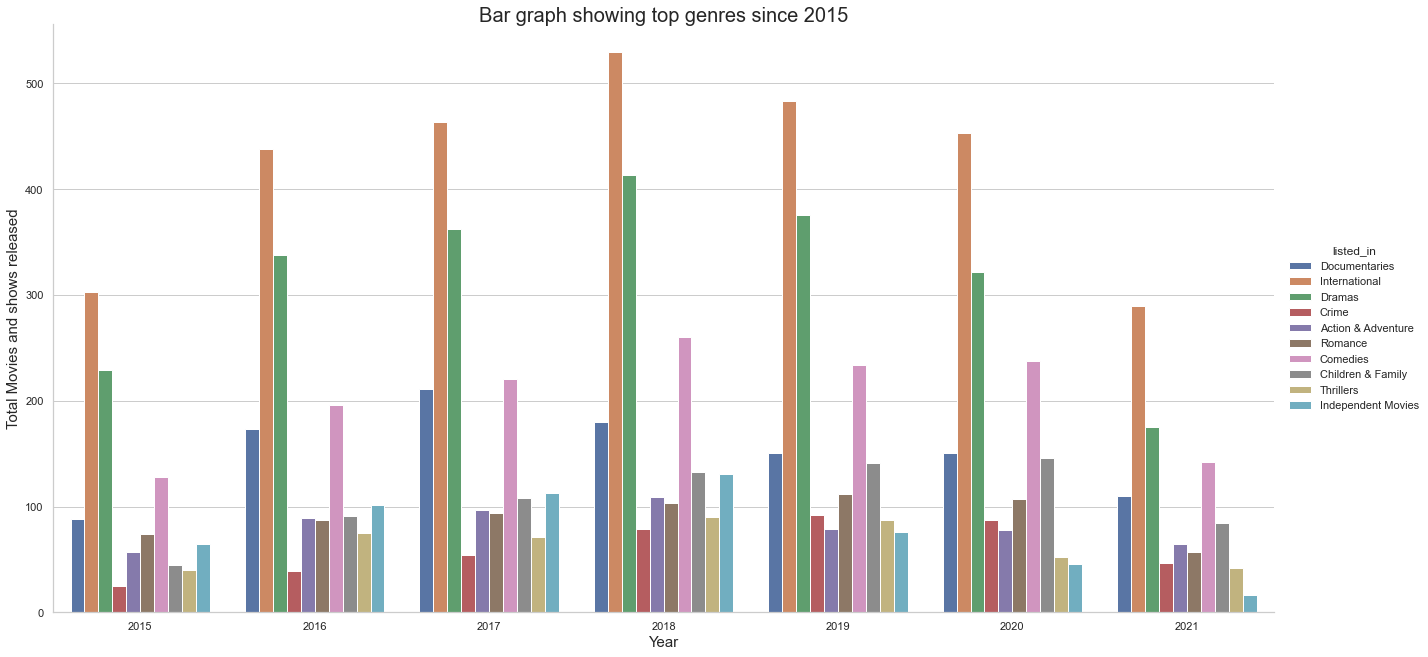

In [43]:
sns.catplot(x="release_year", hue="listed_in", 
                data=df5, kind="count",
                height=9, aspect=2);
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total Movies and shows released', fontsize=15)
plt.title('Bar graph showing top genres since 2015',fontsize=20,pad=2)
plt.show()

Since 2015, the Intenational genre has seen highest count of movie releases followed by the Drama genre